# Introduction

> Customer lifetime value (CLV) is a measure of the total income a business can expect to bring in from a typical customer for as long as that person or account remains a client.

The customer lifetime value (CLV) is calculated using the following formula:

$$
\text{CLV} = \sum_{t=1}^{T} \frac{(C_t)}{(1 + k)^t} - CAC
$$

Where:
- $\text{CLV}$ is the customer lifetime value.
- $ T $ is the total number of periods.
- $ C_t $ is the margin (profit) per customer at period t.
- $ (1 + k)^t $ is the discount rate or cost of capital.
- $ k $ is the cost of capital (commonly 10-20%).
- CAC is Cost Acquired Customer (at present time).

NOTE: 
- Instead using profit per customer, we can use revenue per customer if the costs to make products is fluctuate.
- Also, we can assume that there ignore the discount rate, assume there is no time value of money.

If the value is for prediction purpose:
$$
\text{CLV} =  C_t - CAC_t
$$

Where,

- $C_t = AOV * AFR * GM *ACL$
- $AOV = Average Order Value = \frac{Total Revenue}{Total Purchases}$
- $AFR = Average Frequency Rate = \frac{Total Purchases}{Number Of Unique Customers}$
- $GM = Gross Margin = \frac{Profit}{Total Revenue}$
- $ACL = Average Customer Lifespan = \frac{1}{Churn Rate}$
- $Churn Rate = \frac{Lost Customers}{Total Customers At The Start Of Time Period}$
- $CAC = \frac{Costs Associated With Converting A Customer}{The Number Of Customers Acquired}$

NOTE: 
- MAKE SURE THAT CAC is at that time
- Understanding what the customer lifetime value (CLV) is for individual customers can help marketers justify their marketing budget, as well as target potential high-value customers.
- It is generally more expensive to acquire new customers than to keep existing customers, so knowing the lifetime value and the costs associated with acquiring new customers is essential in order to build marketing strategies with a positive ROI. 


The rule of thumb:

- If CLV of customer < 0 ==> It is better to just work with the existing customers.


# Predicting the 3 month CLV with Python


For this exercise, we will be using one of the publicly available datasets from the UCI Machine Learning Repository, which can be found at this link: http://archive.ics.uci.edu/ml/datasets/online+retail.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Online Retail.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
# Data clean up

# Handling negative quantity
df = df.loc[df['Quantity'] > 0]
# Dropping NaN records
df = df[pd.notnull(df['CustomerID'])]
# Handling incomplete data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.loc[df['InvoiceDate'] < '2011-12-01']
# Creating Sales feature
df['Sales'] = df['Quantity'] * df['UnitPrice']

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380620 entries, 0 to 516368
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    380620 non-null  object        
 1   StockCode    380620 non-null  object        
 2   Description  380620 non-null  object        
 3   Quantity     380620 non-null  int64         
 4   InvoiceDate  380620 non-null  datetime64[ns]
 5   UnitPrice    380620 non-null  float64       
 6   CustomerID   380620 non-null  float64       
 7   Country      380620 non-null  object        
 8   Sales        380620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.0+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
# Per order data

orders = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max,
})
orders

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

In [19]:
# Data analysis

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [33]:
summary = orders.reset_index()\
            .groupby('CustomerID')\
            .agg({'Sales': [min, max, sum, np.mean, groupby_count],
                 'InvoiceDate': [min, max, purchase_duration, avg_frequency]
                 })

summary.head()

Sales                                          \
                 min       max       sum          mean count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   

                               
           purchase_frequency  
CustomerID                     
12346.0                   0.0  
12347.0                  54.5  
12348.0                  70.5  
12349.0                   0.0  
12350.0                   0.0

In [34]:
summary.columns = ['_'.join(col).lower() for col in summary.columns]

summary.head()

,sales_min,sales_max,sales_sum,sales_mean,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.0
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.0
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.0


In [35]:
summary = summary.loc[summary['invoicedate_purchase_duration'] > 0]

summary.shape

(2692, 9)

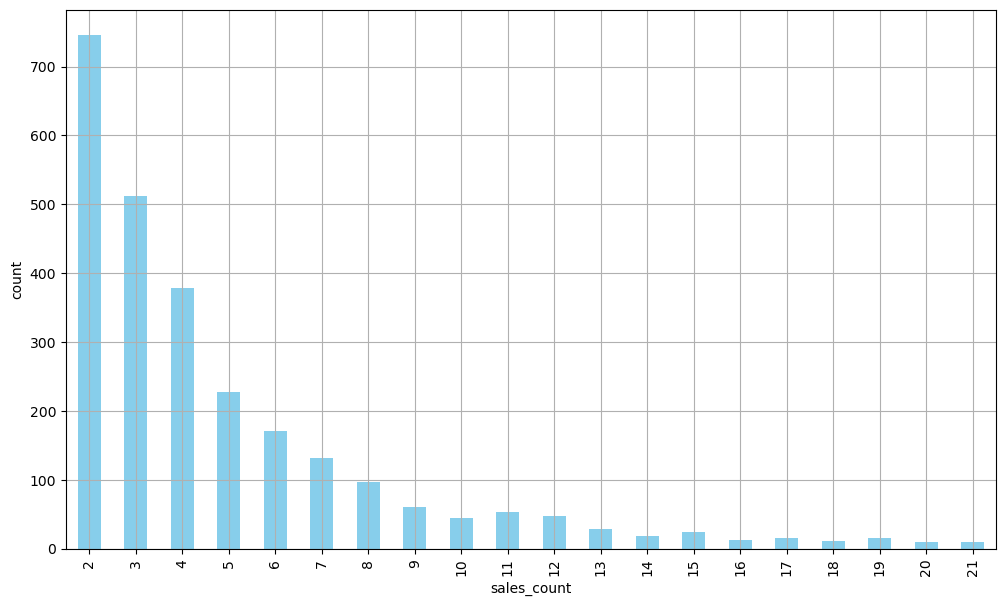

In [37]:
ax = summary.groupby('sales_count').count()['sales_mean'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [38]:
summary['sales_count'].describe()

count    2692.000000
mean        5.971025
std         8.878128
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       201.000000
Name: sales_count, dtype: float64

In [39]:
summary['sales_mean'].describe()

count     2692.000000
mean       391.458687
std        465.584404
min          3.450000
25%        197.661000
50%        306.043333
75%        444.524000
max      14844.766667
Name: sales_mean, dtype: float64

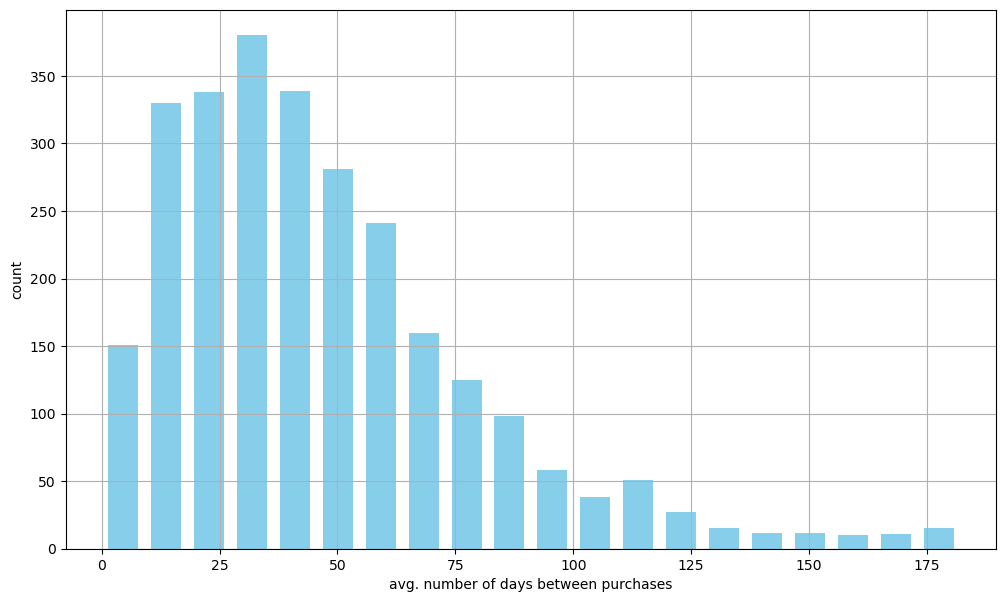

In [40]:
ax = summary['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

NOTE: As you can see from this plot, the majority of repeat customers made purchases every 20 to 50 days.

In [61]:
# Data preparation

clv_freq = '3M' # Breaking down the data into chunks of 3 months for each customer.

data = orders.reset_index().groupby(['CustomerID', 
                                     pd.Grouper(key='InvoiceDate', freq=clv_freq)
                                    ])\
            .agg({'Sales': [sum, np.mean, groupby_count]})

data.columns = ['_'.join(col).lower() for col in data.columns]
data = data.reset_index()
data

,CustomerID,InvoiceDate,sales_sum,sales_mean,sales_count
0,12346.0,2011-03-31,77183.60,77183.600000,1
1,12347.0,2010-12-31,711.79,711.790000,1
2,12347.0,2011-03-31,475.39,475.390000,1
3,12347.0,2011-06-30,1018.77,509.385000,2
4,12347.0,2011-09-30,584.91,584.910000,1
...,...,...,...,...,...
9215,18283.0,2011-06-30,524.68,131.170000,4
9216,18283.0,2011-09-30,278.09,92.696667,3
9217,18283.0,2011-12-31,766.21,153.242000,5
9218,18287.0,2011-06-30,765.28,765.280000,1


In [76]:
def date_month_map(x):
    if str(x.date()) == '2011-12-31':
        return 'M_1'
    if str(x.date()) == '2011-09-30':
        return 'M_2'
    if str(x.date()) == '2011-06-30':
        return 'M_3'
    if str(x.date()) == '2011-03-31':
        return 'M_4'
    if str(x.date()) == '2010-12-31':
        return 'M_5'    

In [80]:
data['M'] = data['InvoiceDate'].apply(date_month_map)

data.head()

,CustomerID,InvoiceDate,sales_sum,sales_mean,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


As briefly mentioned before, we are going to use the last 3 months as the target variable and the rest as the features, meaning we are going to train a machine learning model that predicts the last 3 months' customer value with the rest of the data.

In [81]:
features = pd.pivot_table(data.loc[data['M'] != 'M_1'],
                         values=['sales_sum', 'sales_mean', 'sales_count'],
                         columns='M',
                         index='CustomerID')

features.columns = ['_'.join(col) for col in features.columns]

print(features.shape)
features.head()

(3616, 12)


,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_mean_M_2,sales_mean_M_3,sales_mean_M_4,sales_mean_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,1.0,NaN,NaN,NaN,77183.600,NaN,NaN,NaN,77183.60,NaN
12347.0,1.0,2.0,1.0,1.0,584.91,509.385,475.390,711.79,584.91,1018.77,475.39,711.79
12348.0,1.0,1.0,1.0,1.0,310.00,367.000,227.440,892.80,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,1.0,NaN,NaN,NaN,334.400,NaN,NaN,NaN,334.40,NaN
12352.0,2.0,NaN,5.0,NaN,316.25,NaN,312.362,NaN,632.50,NaN,1561.81,NaN


In [82]:
features = features.fillna(0)

features.head()

,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_mean_M_2,sales_mean_M_3,sales_mean_M_4,sales_mean_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,0.0,0.0,1.0,0.0,0.00,0.000,77183.600,0.00,0.00,0.00,77183.60,0.00
12347.0,1.0,2.0,1.0,1.0,584.91,509.385,475.390,711.79,584.91,1018.77,475.39,711.79
12348.0,1.0,1.0,1.0,1.0,310.00,367.000,227.440,892.80,310.00,367.00,227.44,892.80
12350.0,0.0,0.0,1.0,0.0,0.00,0.000,334.400,0.00,0.00,0.00,334.40,0.00
12352.0,2.0,0.0,5.0,0.0,316.25,0.000,312.362,0.00,632.50,0.00,1561.81,0.00


In [83]:
response = data.loc[data['M'] == 'M_1',
                   ['CustomerID', 'sales_sum']]

response.columns = ['CustomerID', 'CLV_'+clv_freq]

print(response.shape)
response.head()

(2407, 2)


,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [90]:
sample = features.merge(response, 
                       left_index=True, 
                       right_on='CustomerID', 
                       how='left')

print(sample.shape)
sample.head()

(3616, 14)


,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_mean_M_2,sales_mean_M_3,sales_mean_M_4,sales_mean_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
NaN,0.0,0.0,1.0,0.0,0.00,0.000,77183.600,0.00,0.00,0.00,77183.60,0.00,12346.0,NaN
5.0,1.0,2.0,1.0,1.0,584.91,509.385,475.390,711.79,584.91,1018.77,475.39,711.79,12347.0,1294.32
NaN,1.0,1.0,1.0,1.0,310.00,367.000,227.440,892.80,310.00,367.00,227.44,892.80,12348.0,NaN
NaN,0.0,0.0,1.0,0.0,0.00,0.000,334.400,0.00,0.00,0.00,334.40,0.00,12350.0,NaN
14.0,2.0,0.0,5.0,0.0,316.25,0.000,312.362,0.00,632.50,0.00,1561.81,0.00,12352.0,311.73


In [91]:
sample = sample.fillna(0).reset_index().drop('index', axis=1)
print(sample.shape)
sample.head()

(3616, 14)


,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_mean_M_2,sales_mean_M_3,sales_mean_M_4,sales_mean_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
0,0.0,0.0,1.0,0.0,0.00,0.000,77183.600,0.00,0.00,0.00,77183.60,0.00,12346.0,0.00
1,1.0,2.0,1.0,1.0,584.91,509.385,475.390,711.79,584.91,1018.77,475.39,711.79,12347.0,1294.32
2,1.0,1.0,1.0,1.0,310.00,367.000,227.440,892.80,310.00,367.00,227.44,892.80,12348.0,0.00
3,0.0,0.0,1.0,0.0,0.00,0.000,334.400,0.00,0.00,0.00,334.40,0.00,12350.0,0.00
4,2.0,0.0,5.0,0.0,316.25,0.000,312.362,0.00,632.50,0.00,1561.81,0.00,12352.0,311.73


In [92]:
sample['CLV_'+clv_freq].describe()

count     3616.000000
mean       511.558520
std       2371.743293
min          0.000000
25%          0.000000
50%          0.000000
75%        458.662500
max      68012.350000
Name: CLV_3M, dtype: float64

In [99]:
# Regression Models

from sklearn.model_selection import train_test_split

target_var = 'CLV_'+clv_freq
all_features = [x for x in sample.columns if x not in ['CustomerID', target_var]]

x_train, x_test, y_train, y_test = train_test_split(
    sample[all_features], 
    sample[target_var], 
    test_size=0.3
)

In [100]:
from sklearn.linear_model import LinearRegression

reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [101]:
reg_fit.intercept_

79.15520692517538

In [102]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_count_M_2,42.468626
1,sales_count_M_3,26.081152
2,sales_count_M_4,-102.599134
3,sales_count_M_5,-94.591208
4,sales_mean_M_2,0.479598
5,sales_mean_M_3,-0.357273
6,sales_mean_M_4,-0.285026
7,sales_mean_M_5,-0.865781
8,sales_sum_M_2,0.168167
9,sales_sum_M_3,0.266147


In [105]:
from sklearn.metrics import r2_score, median_absolute_error

train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7424
Out-of-Sample R-Squared: 0.5900
In-Sample MSE: 207.1521
Out-of-Sample MSE: 191.7878


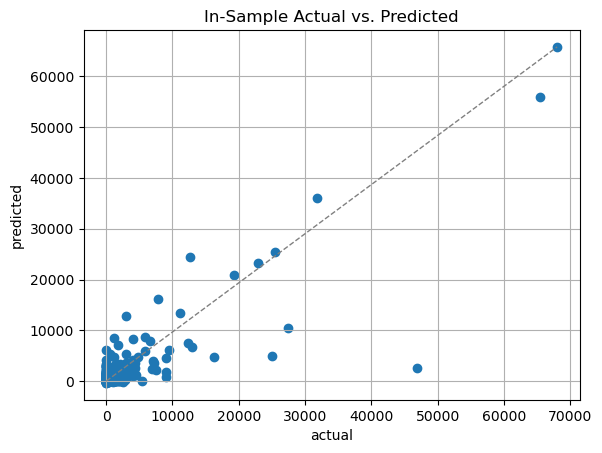

In [106]:
# Scatter plot

plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

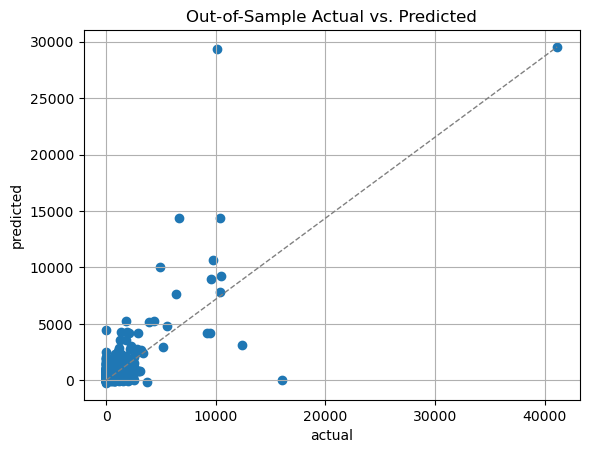

In [107]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()

NOTES:
- Since you know the expected revenue or purchase amount from individual customers for the next 3 months, you can set a better informed budget for your marketing campaign. It should be set high enough to reach your target customers, but low enough to be below the expected 3 month customer value, so that you can have a positive ROI marketing campaign.
- We can also use these 3 month customer value prediction output values to specifically target these high-value customers for the next 3 months. This can help you to create marketing campaigns with a higher ROI, as those high-value customers, predicted by this model, are likely to bring in more revenue than the others.
- Both out-sample and in-sample MAE seems no significantly difference. Looking at these numbers, we do not necessarily see a hint of overfitting or a big gap between the in-sample and out-of-sample performances. 

